In [1]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
%matplotlib inline

In [4]:
df = pd.read_csv("data.csv", encoding='cp1252')
df = df[df.year==2016]
df.head()

,Unnamed: 0,title,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
363,364,The Hills,The Weeknd,canadian contemporary r&b,2016,113,56,58,-7,14,14,242,7,5,84
364,365,Love Yourself,Justin Bieber,canadian pop,2016,100,38,61,-10,28,52,234,84,44,83
365,366,Cake By The Ocean,DNCE,dance pop,2016,119,75,77,-5,4,90,219,15,5,81
366,367,Don't Let Me Down,The Chainsmokers,electropop,2016,160,87,53,-5,14,42,208,16,17,81
367,368,In the Name of Love,Martin Garrix,big room,2016,134,52,50,-6,45,17,196,11,4,81


In [5]:
sc = MinMaxScaler()
df['pop'] = sc.fit_transform(df[['pop']])
df['acous'] = sc.fit_transform(df[['acous']])
df[['pop','acous']]

,pop,acous
363,1.000000,0.070707
364,0.988095,0.848485
365,0.964286,0.151515
366,0.964286,0.161616
367,0.964286,0.111111
...,...,...
438,0.404762,0.010101
439,0.369048,0.050505
440,0.345238,0.090909
441,0.214286,0.252525


In [6]:
k_rng = range(1,10)
sse = []
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df[['pop','acous']])
    sse.append(km.inertia_)
sse

[7.308102474901041,
 3.980375065778955,
 2.1442709346572597,
 1.5153317032360136,
 1.1731579774509067,
 0.9897764529708973,
 0.7967125411442317,
 0.6247564657005288,
 0.5180501938569434]

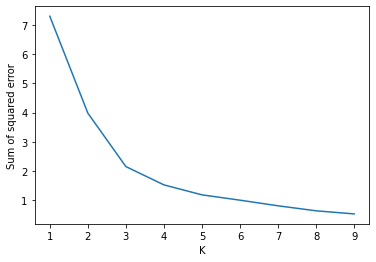

In [7]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)

In [8]:
km = KMeans(n_clusters = 3)

In [9]:
km

KMeans(n_clusters=3)

In [10]:
y_predicted = km.fit_predict(df[['pop','acous']])
y_predicted

array([0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 2, 2, 2, 2,
       2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2])

In [11]:
df['cluster'] = y_predicted
df.head()

,Unnamed: 0,title,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop,cluster
363,364,The Hills,The Weeknd,canadian contemporary r&b,2016,113,56,58,-7,14,14,242,0.070707,5,1.000000,0
364,365,Love Yourself,Justin Bieber,canadian pop,2016,100,38,61,-10,28,52,234,0.848485,44,0.988095,1
365,366,Cake By The Ocean,DNCE,dance pop,2016,119,75,77,-5,4,90,219,0.151515,5,0.964286,0
366,367,Don't Let Me Down,The Chainsmokers,electropop,2016,160,87,53,-5,14,42,208,0.161616,17,0.964286,0
367,368,In the Name of Love,Martin Garrix,big room,2016,134,52,50,-6,45,17,196,0.111111,4,0.964286,0


Text(0, 0.5, 'acous')

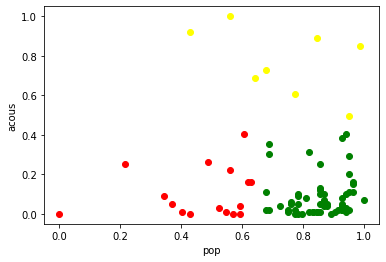

In [12]:
df0 = df[df.cluster==0]
df1 = df[df.cluster==1]
df2 = df[df.cluster==2]

plt.scatter(df0['pop'],df0['acous'],color='green')
plt.scatter(df1['pop'],df1['acous'],color='yellow')
plt.scatter(df2['pop'],df2['acous'],color='red')

plt.xlabel('pop')
plt.ylabel('acous')

In [13]:
df2[['title','pop','acous']]

,title,pop,acous
425,Make Me... (feat. G-Eazy),0.630952,0.161616
426,Keeping Your Head Up,0.619048,0.161616
427,True Colors,0.607143,0.404040
428,Make Me Like You,0.595238,0.040404
429,Champagne Problems,0.595238,0.000000
430,Blown,0.571429,0.000000
432,Pep Rally,0.559524,0.222222
433,Higher,0.547619,0.010101
434,Invitation,0.523810,0.030303
435,One Call Away (feat. Tyga) - Remix,0.488095,0.262626


In [14]:
df1[['title','pop','acous']]

,title,pop,acous
364,Love Yourself,0.988095,0.848485
370,Million Reasons,0.952381,0.494949
398,All I Ask,0.845238,0.888889
411,Don't Be A Fool,0.773810,0.606061
422,Wish That You Were Here - From “Miss Peregrine...,0.678571,0.727273
424,Change,0.642857,0.686869
431,Start,0.559524,1.000000
436,Beautiful Birds (feat. Birdy),0.428571,0.919192


In [15]:
df0[['title','pop','acous']]

,title,pop,acous
363,The Hills,1.000000,0.070707
365,Cake By The Ocean,0.964286,0.151515
366,Don't Let Me Down,0.964286,0.161616
367,In the Name of Love,0.964286,0.111111
368,Into You,0.952381,0.020202
369,This Is What You Came For,0.952381,0.202020
371,Needed Me,0.952381,0.111111
372,7 Years,0.952381,0.292929
373,CAN'T STOP THE FEELING! (Original Song from Dr...,0.940476,0.010101
374,Work from Home (feat. Ty Dolla $ign),0.940476,0.101010
